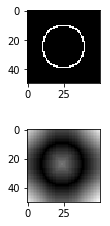

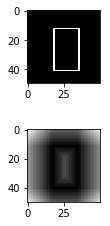

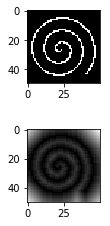

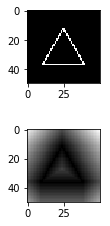

In [5]:
import sys
import glob
import os
import numpy as np
import pdb
import matplotlib.pyplot as plt
from scipy import misc
import random

# load shapes
shapes = glob.glob(os.path.join('shapes', '*.png'))
for i, shape in enumerate(shapes):
    # load the edge map
    edge_map = plt.imread(shapes[i])
    
    # edges to zero, background to infinity
    map_inf = edge_map.copy()
    map_inf[map_inf == 0] = np.inf
    map_inf[map_inf == 1] = 0
    
    # append two rows and two columns
    app_column = np.ones((len(map_inf[:, 0]), 2)) * np.inf
    app_row = np.ones((2, len(map_inf[0, :]) + 2)) * np.inf
    map_half = np.c_[map_inf, app_column]
    map_half = np.r_[map_half, app_row]
    
    # get distance from top left to bottom right
    for i in range(1, len(map_half[:, 0]) - 1):
        for j in range(1, len(map_half[0, :]) - 1):
            bl = map_half[i + 1, j + 1] + 2
            l = map_half[i, j - 1] + 1
            tl = map_half[i - 1, j - 1] + 2
            t = map_half[i - 1, j] + 1
            c = map_half[i, j]
            map_half[i, j] = np.amin(np.array([c, tl, l, bl, t]))
            
    # get discance from bottom right to top left
    map_whole = map_half.copy()
    for i in range(len(map_whole[:, 0]) - 2, 0, -1):
        for j in range (len(map_whole[0, :]) - 2, 0, -1):
            b = map_whole[i + 1, j] + 1
            br = map_whole[i + 1, j + 1] + 2
            r = map_whole[i, j + 1] + 1
            tr = map_whole[i - 1, j + 1] + 2
            c = map_whole[i, j]
            map_whole[i,j] = np.amin(np.array([c, tr, r, br, b]))
            
    # caclulate distance map
    # distance_map: array_like, same size as edge_map
    distance_map = map_whole[1:len(map_whole[:,0]) - 1, 1:len(map_whole[0, :]) - 1]

    # the top row of the plots should be the edge maps, and on the bottom the corresponding distance maps
    k, l = i + 1, len(shapes) + i + 1
    plt.subplot(2, len(shapes), k)
    plt.imshow(edge_map, cmap='gray')
    plt.subplot(2, len(shapes), l)
    plt.imshow(distance_map, cmap='gray')

    plt.show()